In [1]:
# Typical Everydayers...
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.colors import ListedColormap
# cmap = ListedColormap([
#                      '#ec1c34', #(red)
#                      '#fc9d1c', #(orange)
#                      '#fbdb08', #(yellow)
#                      '#2dace4', #(blue)
#                      '#69b138' #(green)
#                     ])
# palette = [
#            '#ec1c34', #(red)
#            '#fc9d1c', #(orange)
#            '#fbdb08', #(yellow)
#            '#2dace4', #(blue)
#            '#69b138' #(green)
#            ]
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

# Unicode, Regex, json for text digestion
import unicodedata
import re
import json

import datetime
# Time formatting
from time import strftime
# Make deepcopy
import copy

# Modeling help...
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# nltk: natural language toolkit -> tokenization, stopwords
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer as stemmer
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# sia = nltk.sentiment.vader.SentimentIntensityAnalyzer()

# Import prepare
import draft_prepare as p

# Quieeet!!! Y'all can't stop me now...
import warnings
warnings.filterwarnings('ignore')

# Let me see it AAAALLLL!!!
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

# set default style for charts
plt.rc('figure', figsize=(13, 7))
# plt.style.use('fivethirtyeight')


### Preparing the data:

In [2]:
# df = p.model_clean(df)
# df.head()

In [3]:
# df = pd.read_csv('songs_0526.csv', index_col = 0)
# df.shape

In [4]:
df = p.get_data()


Features added ******************
topics added                        
Saving to csv in local directory...


In [5]:
# df = p.get_topics(df)

In [5]:
df.head()


,title,artist,date,lyrics,raw_lyrics,decade,character_count,word_count,unique_words,unique_words_count,sentiment,sentiment_category,place_words,chorus_count,verse_count,verse_chorus_ratio,pre_chorus_count,outro_count,bridge_count,hook_count,bigrams,trigrams,topic_name
0,#1,Nelly,2001-10-20,uh uh uh got bring attention dirty better watc...,#1 LyricsUh uh uh I just gotta bring it to the...,2000,2014,363,wait france uhh baby two karat rapper name pan...,228,0.9915,very positive,[hook] [hook] [hook],0,0,0.000000,0,0,0,3,"[(uh, uh), (uh, uh), (uh, got), (got, bring), ...","[(uh, uh, uh), (uh, uh, got), (uh, got, bring)...",sex
1,#9 Dream,John Lennon,1974-12-21,long ago dream dream know yes know seemed real...,#9 Dream Lyrics[Verse 1] So long ago Was it in...,1970,842,135,yes around started go something two believe wa...,49,0.9169,very positive,[verse 1] [pre-chorus 1] [chorus] [verse 2] [p...,2,2,1.000000,2,1,0,0,"[(long, ago), (ago, dream), (dream, dream), (d...","[(long, ago, dream), (ago, dream, dream), (dre...",love
2,#Beautiful,Mariah Carey Featuring Miguel,2013-05-25,ah ah beautiful ah ah beautiful hop back bike ...,"#Beautiful Lyrics[Intro: Mariah Carey] Ah, ah,...",2010,768,129,yes always hair take hop like care baby darlin...,54,0.9989,very positive,[intro: mariah carey] [verse 1: miguel] [choru...,2,2,1.000000,0,1,0,0,"[(ah, ah), (ah, beautiful), (beautiful, ah), (...","[(ah, ah, beautiful), (ah, beautiful, ah), (be...",lost
3,#SELFIE,The Chainsmokers,2014-03-15,jason table kept seeing look girl think make j...,#SELFIE Lyrics[Verse 1] When Jason was at the ...,2010,954,172,wait living xx look know texting vodka need on...,100,0.9218,very positive,[verse 1] [drop 1] [verse 2] [drop 2] [verse 3...,0,3,0.000000,0,0,0,0,"[(jason, table), (table, kept), (kept, seeing)...","[(jason, table, kept), (table, kept, seeing), ...",violence
4,#thatPOWER,will.i.am Featuring Justin Bieber,2013-04-06,oh alive alive alive oh fly fly fly oh alive a...,#thatPOWER Lyrics[Instrumental break] [Pre-Ch...,2010,1238,208,whatever attire kill alive hate better stronge...,77,0.9984,very positive,[instrumental break] [pre-chorus: justin biebe...,3,2,0.666667,3,1,1,0,"[(oh, alive), (alive, alive), (alive, alive), ...","[(oh, alive, alive), (alive, alive, alive), (a...",sex


## Topic Modeling

#### Latent Dirichlet Allocation:

In [75]:
# Create an instance
cv = CountVectorizer(max_df = .95, min_df = 2, stop_words = 'english')

# Fit and transform the lemmatized lyrics data
cv_fit = cv.fit_transform(df.lyrics)

print('\nShape of the sparse matrix\n')
cv_fit


Shape of the sparse matrix



<23762x26186 sparse matrix of type '<class 'numpy.int64'>'
	with 1385311 stored elements in Compressed Sparse Row format>

In [76]:
# Create the instance for LDA
lda = LatentDirichletAllocation(n_components = 20, random_state = 42)

# Fit the vectorizer with the LDA
lda.fit(cv_fit)

print('Number of topics:', len(lda.components_))
print('Number of columns of the LDA fit', len(lda.components_[0]))

Number of topics: 20
Number of columns of the LDA fit 26186


In [77]:
feature = cv.get_feature_names()

print('Length of feature names:', len(feature))

Length of feature names: 26186


In [78]:
for ind, topic in enumerate(lda.components_):
    print('-'*117)
    print('Top 50 words in topic {}'.format(ind))
    print('-'*117)
    top_50 = topic.argsort()[-50:]
    print([feature[i] for i in top_50], '\n\n')


---------------------------------------------------------------------------------------------------------------------
Top 50 words in topic 0
---------------------------------------------------------------------------------------------------------------------
['jealous', 'door', 'said', 'somebody', 'body', 'ey', 'cadillac', 'hit', 'told', 'let', 'preach', 'monster', 'boy', 'ow', 'amen', 'think', 'judge', 'maria', 'dab', 'jane', 'blow', 'hey', 'better', 'papa', 'say', 'ding', 'make', 'devil', 'hollywood', 'da', 'brother', 'men', 'way', 'like', 'got', 'pump', 'hard', 'bump', 'mary', 'hallelujah', 'yo', 'lie', 'day', 'knock', 'going', 'help', 'work', 'gone', 'mama', 'ya'] 


---------------------------------------------------------------------------------------------------------------------
Top 50 words in topic 1
---------------------------------------------------------------------------------------------------------------------
['tight', 'dum', 'lover', 'lady', 'true', 'man', 'mind', 'm

In [11]:
# Final df transforming cv_fit
df_final = lda.transform(cv_fit)

# Make copy to save original df 
df_new = copy.deepcopy(df)


In [12]:
print('\nChecking the probability distribution of one text data belonging to the topic.\n')

print('Few words from 1st row:', df.lyrics[0][:88], '\n')

print('Probability distribution:', df_final[0])


In [13]:
prob = df_final[0][df_final[0].argmax()].round(2)

print('Document belong to the topic', df_final[0].argmax(), 'with the probability of', prob)


In [14]:
df['topic'] = df_final.argmax(axis = 1)

# df_new.head()

In [15]:
# Creating a dictionary with key as topic numbers and value as topic names
topic_label = {0:'Jealousy', 1:'Affection', 2:'Breakup', 3:'Dance', 4:'Holiday', 5:'Nature', 
               6:'Spanish', 7:'Transcendental', 8:'Lost', 9:'Violence', 10:'Youth', 11:'Love', 12:'Heartache', 
               13:'Money', 14:'Affection', 15:'Sex', 16:'Dance', 17:'Good Vibes', 18:'Americana', 19:'Breakup'}

# Mapping the dictionary with the dataframe to get the labels.
df['topic_name'] = df['topic'].map(topic_label)

# Head of the dataframe
# df.head(3)

In [16]:
# def get_topics(df):
#     # Create an instance
#     cv = CountVectorizer(max_df = .95, min_df = 2, stop_words = 'english')
    
#     # Fit and transform the lemmatized lyrics data
#     cv_fit = cv.fit_transform(df.lyrics)

#     # Create the instance for LDA
#     lda = LatentDirichletAllocation(n_components = 20, random_state = 42)
    
#     # Fit the vectorizer with the LDA
#     lda.fit(cv_fit)
    
#     # Pull feature names out and define as feature
#     feature = cv.get_feature_names()
    
#     # Final df transforming cv_fit
#     df_final = lda.transform(cv_fit)
    
# #     # Make copy to save original df 
# #     df_new = copy.deepcopy(df)
    
#     prob = df_final[0][df_final[0].argmax()].round(2)
    
#     # Assign the opics tp the dataframe
#     df['topic'] = df_final.argmax(axis = 1)
    
#     # Creating a dictionary with key as topic numbers and value as topic names
#     topic_label = {0:'Love', 1:'Kind Goodbye', 2:'Appeasing', 3:'Club', 4:'Country Life', 5:'Resentful Goodbye', 
#                    6:'Lost', 7:'Hard Times', 8:'Nature', 9:'Miracles', 10:'Money', 11:'Dance', 12:'Fun', 
#                    13:'Dance', 14:'Weekend', 15:'Transcendental', 16:'Sex', 17:'Summer', 18:'Spanish', 19:'Affection'}
    
#     # Mapping the dictionary with the dataframe to get the labels.
#     df['topic_name'] = df['topic'].map(topic_label)
# #     # Drop the unnecessary duplicate column
# #     df = pd.concat([df, df_new['topic_name']], axis = 1)
#     # Drop unnecessary column 'topic'
#     df = df.drop(columns = ['topic'])
#     return df

In [17]:
# get_topics(df)
# df.head()

### Sentiment

In [18]:
# df['sentiment'] = df.lyrics.apply(lambda msg: sia.polarity_scores(msg)['compound'])

In [19]:
# sentiments = sia
# df["positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["lyrics"]]
# df["negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["lyrics"]]
# df["neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["lyrics"]]
# df['compound'] = [sentiments.polarity_scores(i)["compound"] for i in data["lyrics"]]

# scores = df["lyrics"].values
# sentiment = []
# for score in scores:
#     if score >= 0.05 :
#         sentiment.append('positive')
#     elif score <= -0.05 :
#         sentiment.append('negative')
#     else:
#         sentiment.append('neutral')
# data["sentiment_class"] = sentiment

## Exploration

In [20]:
# df = df.drop(columns = ['Unnamed: 0'])

In [21]:
def split_data(df):
    '''
    This function takes in a data frame and splits it appropriately in order
    to return a train with 56%, validate with 24%, and test with 20% of the
    original data frame.
    '''
    # Split with train being 80% and test being 20%. Stratify on target.
    train, test = train_test_split(df, test_size = .2, random_state = 123)
    # Split the remaining train into 70% train and 30% validate.
    train, validate = train_test_split(train, test_size = .3, random_state = 123)
    # Spiltting results in a split with 56% train, 24% validate, and 20% test data from original
    return train, validate, test

In [22]:
train, validate, test = split_data(df)
train.shape[0], validate.shape[0], test.shape[0]

(13306, 5703, 4753)

In [85]:
# # What song has the lowest sentiment?
# train.sort_values(by = ['sentiment'], ascending = True).head(3)

In [84]:
# # What song has the highest sentiment?
# df.sort_values(by = ['sentiment'], ascending = False).head(3)

In [83]:
# df.sort_values(by = ['topic_name'], ascending = True)

<AxesSubplot:xlabel='topic_name'>

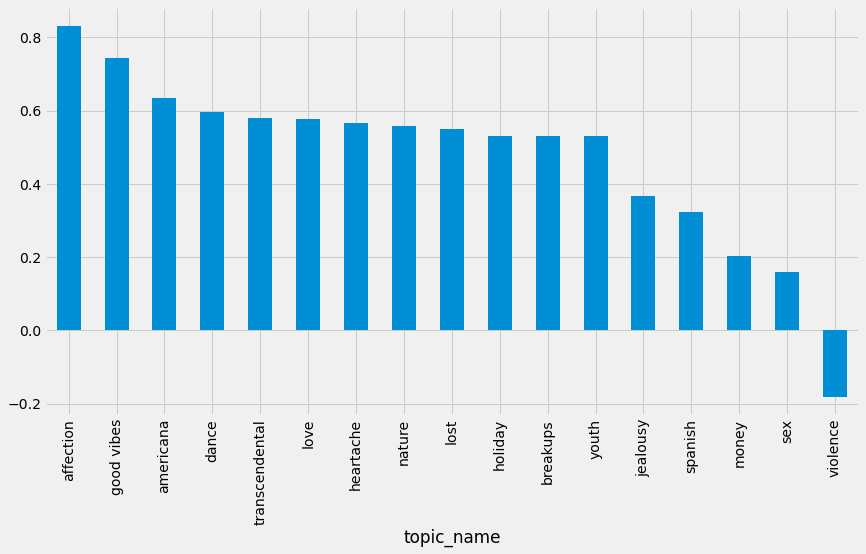

In [26]:
# What is the average sentiment for each topic?
df.groupby(['topic_name']).mean()['sentiment'].sort_values(ascending = False).plot(kind = 'bar')

In [91]:
# Original
# Most popular topics...
def topic_popularity(df):
    df.topic_name.value_counts().plot(kind = 'bar')
    plt.title('Billboard Hot 100 Topic Popularity 1958-Present')
    plt.xlabel('Topic Descriptors')
    plt.xticks(rotation = 35, ha = 'right')
    plt.ylabel('Song Topic Count')
    return

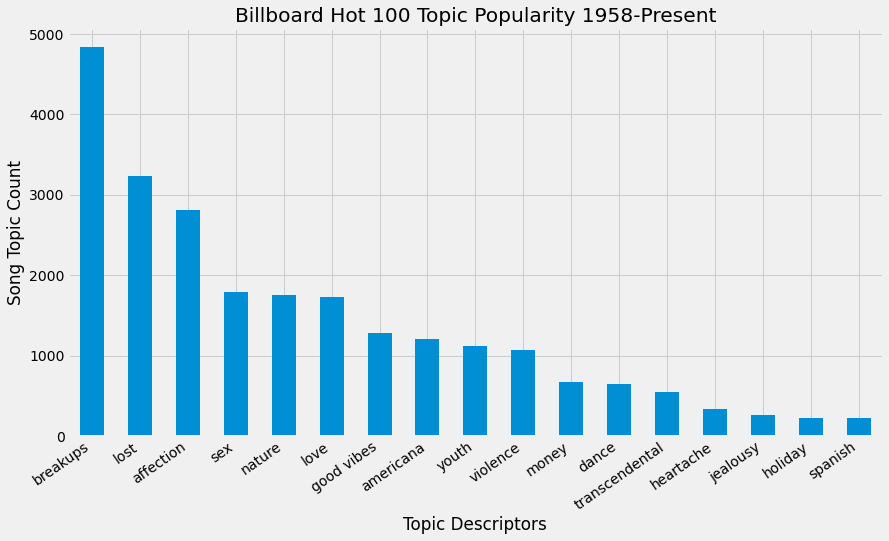

In [92]:
topic_popularity(df)

In [257]:
# Original
# Most popular topics...
def topic_popularity(df):
    df.topic_name.value_counts().plot(kind = 'bar', cmap = cmap)
    plt.title('Billboard Hot 100 Topic Popularity 1958-Present')
    plt.xlabel('Topic Descriptors')
    plt.xticks(rotation = 35, ha = 'right')
    plt.ylabel('Song Topic Count')
    return

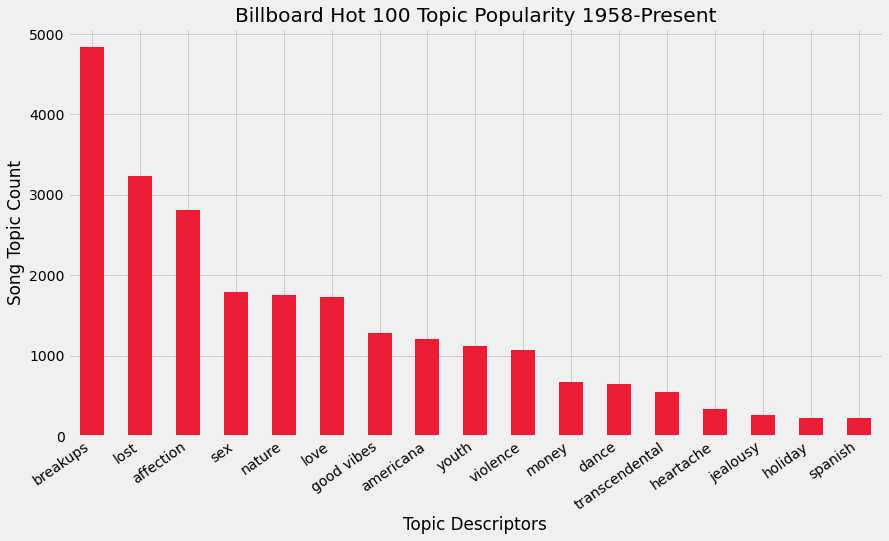

In [258]:
topic_popularity(df)

In [29]:
# What topics are most common in each decade?
df.groupby(['topic_name', 'decade']).size()\
                                    .unstack()\
                                    .sort_values(by = 'topic_name', 
                                                 ascending = False).T\
#                                     .plot(kind = 'bar', ec = 'black')
# plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad=0.)

topic_name,youth,violence,transcendental,spanish,sex,nature,money,love,lost,jealousy,holiday,heartache,good vibes,dance,breakups,americana,affection
decade,,,,,,,,,,,,,,,,,
1950,47,1,12,5,5,42,9,29,90,6,8,9,9,10,83,42,110
1960,267,25,162,12,25,403,61,236,710,53,66,97,203,125,1045,251,827
1970,271,32,150,24,24,407,73,272,593,64,34,97,209,166,817,186,592
1980,179,24,80,15,30,275,46,450,603,29,36,38,176,143,862,132,488
1990,92,78,55,22,290,197,91,237,375,30,14,29,196,63,614,88,385
2000,117,119,43,55,569,210,69,241,415,32,28,30,205,56,646,157,178
2010,132,479,40,57,659,195,248,250,381,44,32,33,223,85,630,299,212
2020,11,308,8,31,188,27,75,20,70,1,9,6,63,5,134,56,23


In [228]:
# Original
def all_topics_Prevalence(df):   
    ax = sns.countplot(data = df, x = 'decade', hue = 'topic_name', ec = 'black')
    plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad=0.)
    plt.title('Topics\' Prevalence Over the Decades')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=25)
    plt.xlabel('Decade of Song')
    plt.ylabel('Song Count')
    plt.show()
    return

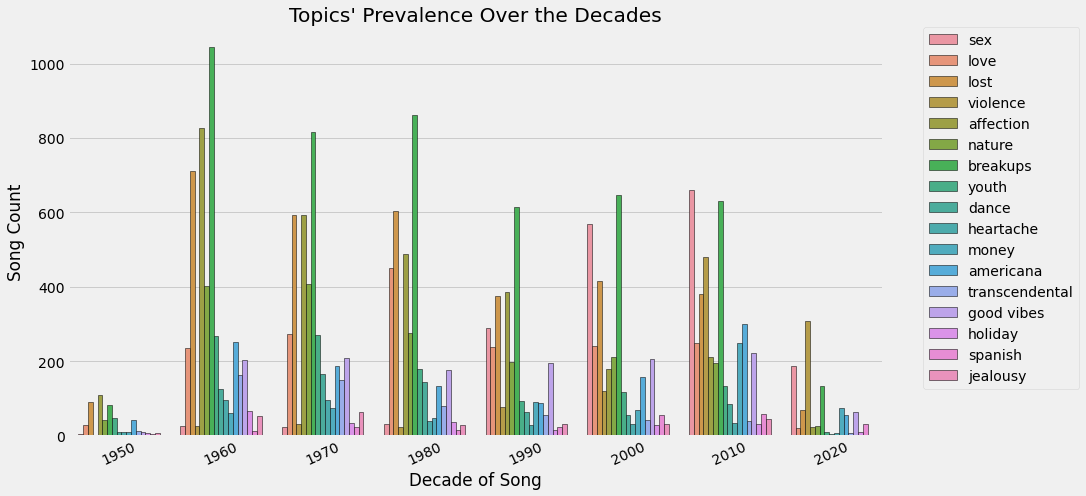

In [229]:
all_topics_Prevalence(df)

In [254]:
# Billboard Colors
def all_topics_Prevalence(df):   
    ax = sns.countplot(data = df, x = 'decade', hue = 'topic_name', ec = 'black', palette = palette)
    plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad=0.)
    plt.title('Topics\' Prevalence Over the Decades')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=25)
    plt.xlabel('Decade of Song')
    plt.ylabel('Song Count')
    plt.show()
    return

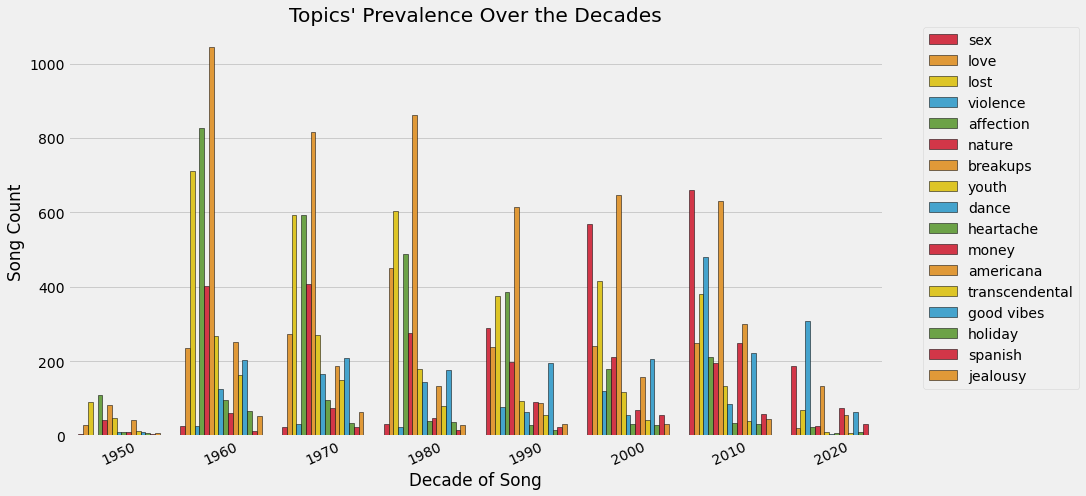

In [255]:
all_topics_Prevalence(df)

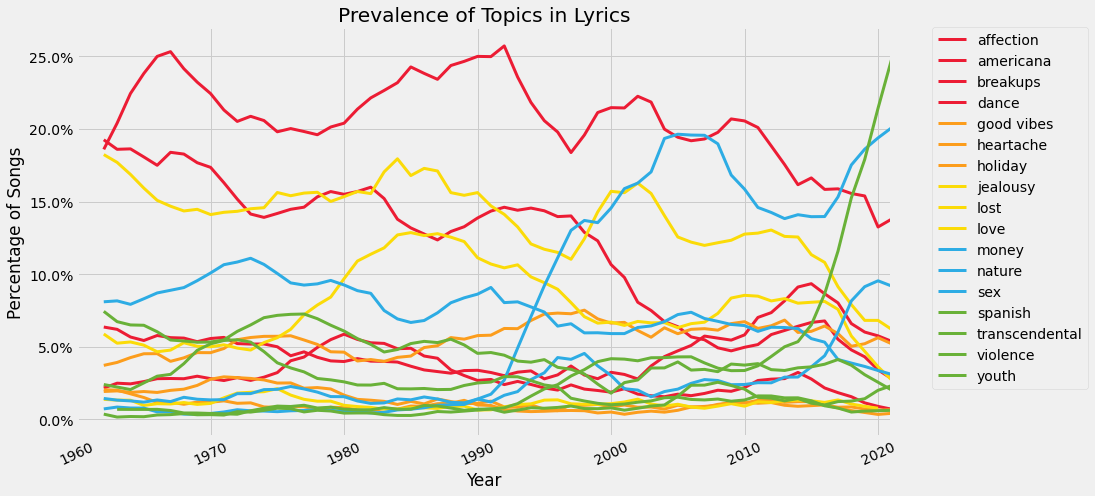

In [256]:
# Billboard Colors
# make a copy
    df2 = df.copy()
    df2 = df2.set_index('date')
    # add a column to the dataframe where any topic that is a relationship topic is gathered and all 

    ax = df2.groupby('topic_name').resample('Y').size().unstack(0).rolling(5).mean()\
                                      .apply(lambda row: row / row.sum(), axis=1).plot(kind = 'line', linewidth = 3, cmap = cmap)
    # move the legend outside
    plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad=0.)
    plt.xlim(pd.to_datetime('1960'), pd.to_datetime('2021'))
#     plt.ylim()
    plt.title('Prevalence of Topics in Lyrics')
    plt.xlabel('Year')
    plt.xticks(rotation = 25)
    plt.ylabel('Percentage of Songs')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
    plt.show()

In [32]:
# What are the top 5 topics for each decade?
train.groupby(['decade']).topic_name.value_counts().head(19)


decade  topic_name    
1950    affection          69
        breakups           47
        lost               47
        youth              30
        americana          27
        nature             25
        love               18
        good vibes          6
        money               6
        heartache           5
        holiday             5
        transcendental      5
        dance               4
        spanish             4
        jealousy            2
        sex                 2
        violence            1
1960    breakups          550
        affection         465
Name: topic_name, dtype: int64

In [33]:
train.topic_name.value_counts()

breakups          2665
lost              1802
affection         1591
sex               1025
nature             983
love               944
good vibes         750
americana          671
youth              644
violence           600
money              360
dance              355
transcendental     329
heartache          195
jealousy           140
holiday            131
spanish            121
Name: topic_name, dtype: int64

In [34]:
# #create a variable that stores a list relationship topics
# relationships = ['affection','breakups','love', 'breakup', 
#                  'sex', 'heartache', 'jealousy']
# # make a copy
# train2 = train.copy()
# #add a column to the dataframe where any language not in the top five is represented by 'other'
# train2['relationship_topics'] = np.where(train2.topic_name.isin(relationships), train2.topic_name, 'other')
# train2 = train2.loc[train2['relationship_topics'] != 'other']

In [37]:
# Original
def relationship_bar(df):   
    # create a variable that stores a list relationship topics
    relationships = ['affection','breakups','love', 'breakup', 
                     'sex', 'heartache', 'jealousy']
    # make a copy
    df2 = df.copy()
    # add a column to the dataframe where any topic that is a relationship topic is gathered and all 
    # others are represented by 'other'
    df2['relationship_topics'] = np.where(df2.topic_name.isin(relationships), df2.topic_name, 'other')
    # drop anything that isn't a relationship topic
    df2 = df2.loc[df2['relationship_topics'] != 'other']
    df2.groupby('decade').relationship_topics.value_counts(normalize = True).unstack().plot(kind = 'bar', width = 1, ec = 'black')
    plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad=0.)
    plt.title('Relationship Topics\' Prevalence Over the Decades')
    plt.xlabel('Decade of Song')
    plt.ylabel('Song Topic Count')
    plt.show()
    return


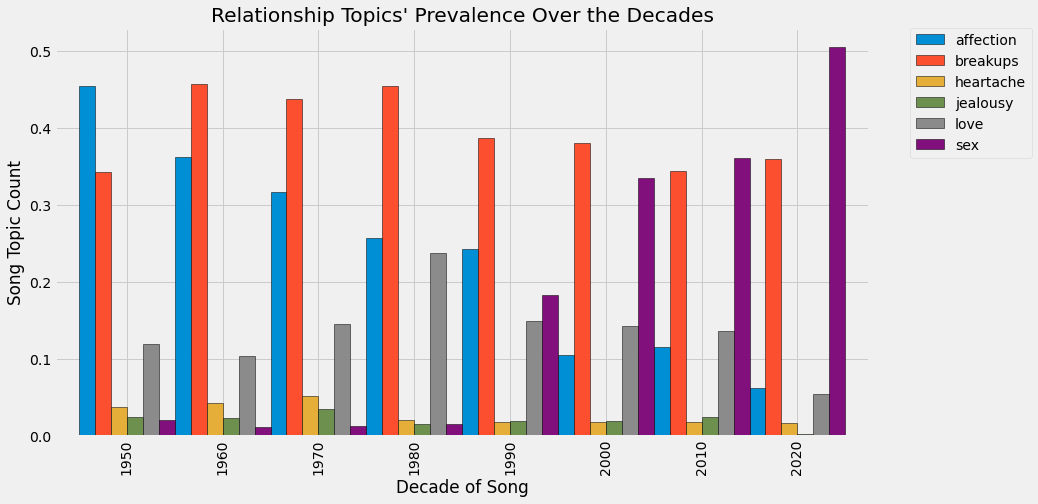

In [38]:
relationship_bar(df)

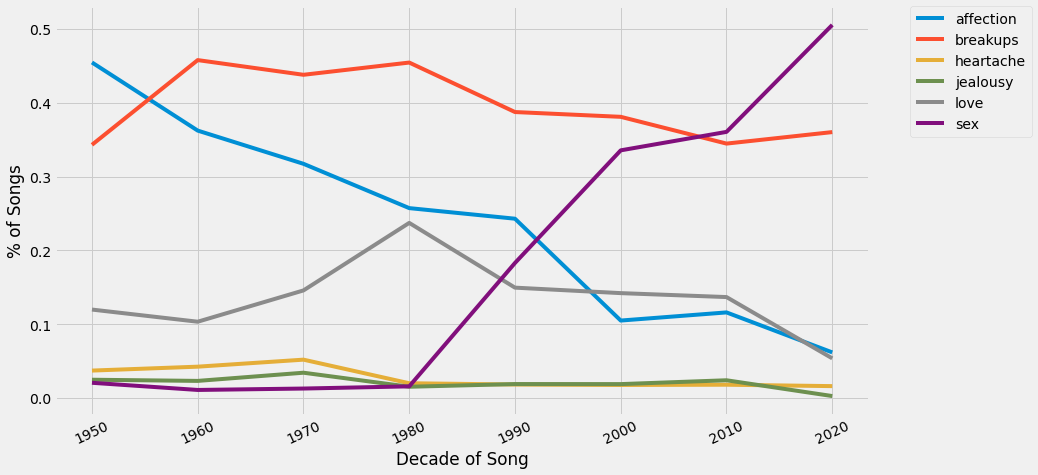

In [226]:
# create a variable that stores a list relationship topics
relationships = ['affection','breakups','love', 'breakup', 
                 'sex', 'heartache', 'jealousy']
# make a copy
df2 = df.copy()
df2 = df2.set_index('date')
# add a column to the dataframe where any topic that is a relationship topic is gathered and all 
# others are represented by 'other'
df2['relationship_topics'] = np.where(df2.topic_name.isin(relationships), df2.topic_name, 'other')

# drop anything that isn't a relationship topic
df2 = df2.loc[df2['relationship_topics'] != 'other']
df2.groupby('decade').relationship_topics.value_counts(normalize = True).unstack().plot(kind = 'line')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad=0.)
plt.title('')
plt.xlabel('Decade of Song')
plt.xticks(rotation = 25)
plt.ylabel('% of Songs')
plt.show()


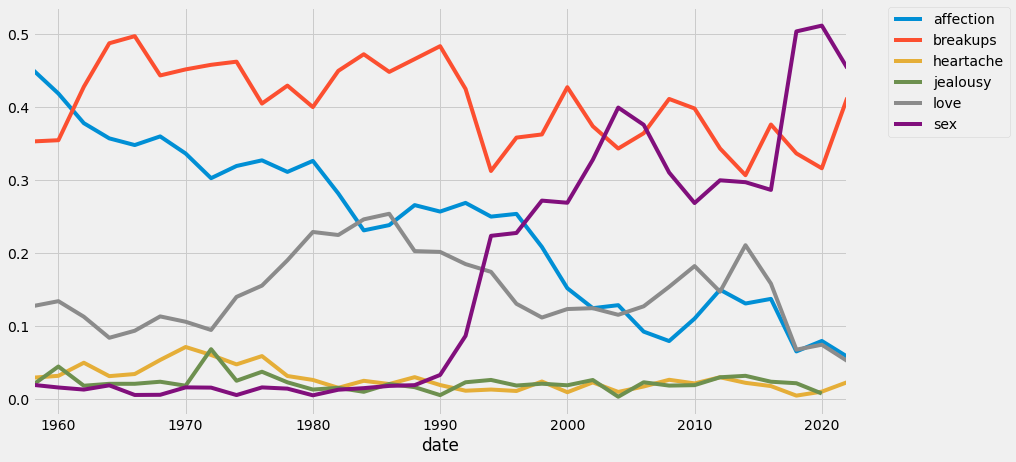

In [123]:
df2.groupby('relationship_topics').resample('2Y').size().unstack(0)\
                                  .apply(lambda row: row / row.sum(), axis=1).plot(kind = 'line')
# move the legend outside
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad=0.)

In [196]:
# Original
def relationship_line(df):
    # create a variable that stores a list relationship topics
    relationships = ['affection','breakups','love', 'breakup', 
                     'sex', 'heartache', 'jealousy']
    # make a copy
    df2 = df.copy()
    df2 = df2.set_index('date')
    # add a column to the dataframe where any topic that is a relationship topic is gathered and all 
    # others are represented by 'other'
    df2['relationship_topics'] = np.where(df2.topic_name.isin(relationships), df2.topic_name, 'other')
    # drop anything that isn't a relationship topic
    df2 = df2.loc[df2['relationship_topics'] != 'other']
    ax = df2.groupby('relationship_topics').resample('Y').size().unstack(0).rolling(5).mean()\
                                      .apply(lambda row: row / row.sum(), axis=1).plot(kind = 'line', linewidth = 3)
    # move the legend outside
    plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad=0.)
    plt.xlim(pd.to_datetime('1960'), pd.to_datetime('2021'))
#     plt.ylim()
    plt.title('Prevalence of Relationship Topics in Lyrics')
    plt.xlabel('Year')
    plt.xticks(rotation = 25)
    plt.ylabel('Percentage of Songs')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
    plt.show()
    return


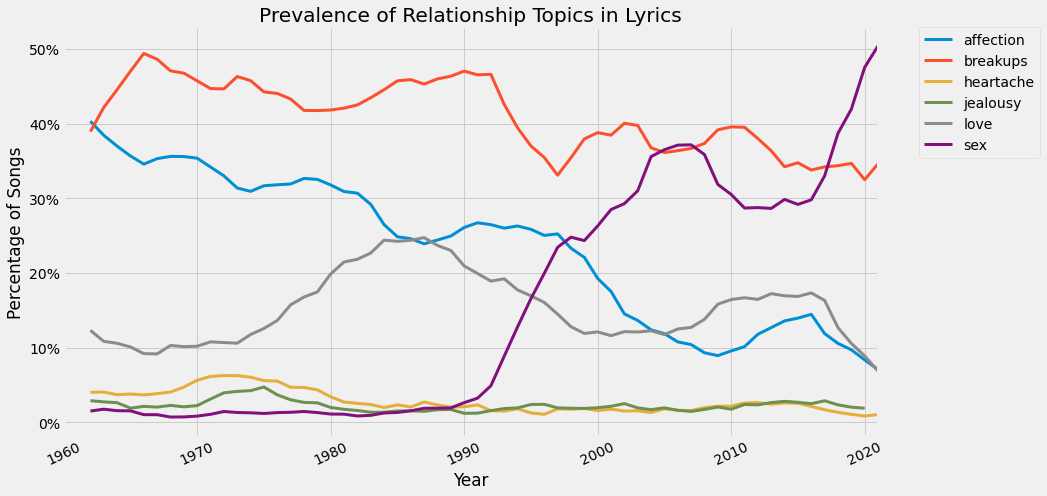

In [197]:
relationship_line(df)

In [38]:
def relationship_line(df):
    # create a variable that stores a list relationship topics
    relationships = ['affection','breakups','love', 'breakup', 
                     'sex', 'heartache', 'jealousy']
    my_cmap = ListedColormap([
    '#ec1c34', #(red)
    '#1f1e1b', #(black)
    '#fc9d1c', #(orange)
    '#fbdb08', #(yellow)
    '#2dace4', #(blue)
    '#69b138' #(green)
    ])
    # make a copy
    df2 = df.copy()
    df2 = df2.set_index('date')
    # add a column to the dataframe where any topic that is a relationship topic is gathered and all 
    # others are represented by 'other'
    df2['relationship_topics'] = np.where(df2.topic_name.isin(relationships), df2.topic_name, 'other')
    # drop anything that isn't a relationship topic
    df2 = df2.loc[df2['relationship_topics'] != 'other']
    ax = df2.groupby('relationship_topics').resample('Y').size().unstack(0).rolling(5).mean()\
                                      .apply(lambda row: row / row.sum(),axis=1).plot(kind = 'line', linewidth = 3, cmap = my_cmap)
    # move the legend outside
    plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad=0.)
    plt.xlim(pd.to_datetime('1960'), pd.to_datetime('2021'))
#     plt.ylim()
    plt.title('Prevalence of Relationship Topics in Lyrics')
    plt.xlabel('Year')
    plt.xticks(rotation = 25)
    plt.ylabel('Percentage of Songs')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
    plt.show()
    return

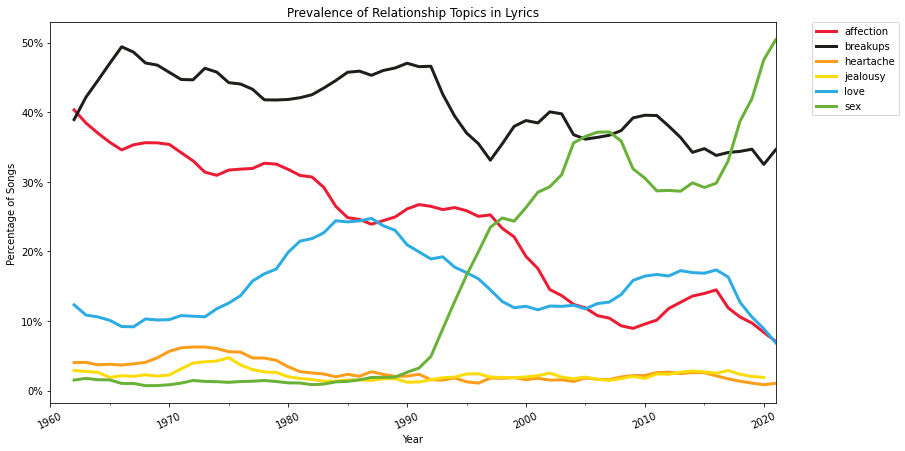

In [39]:
relationship_line(df)

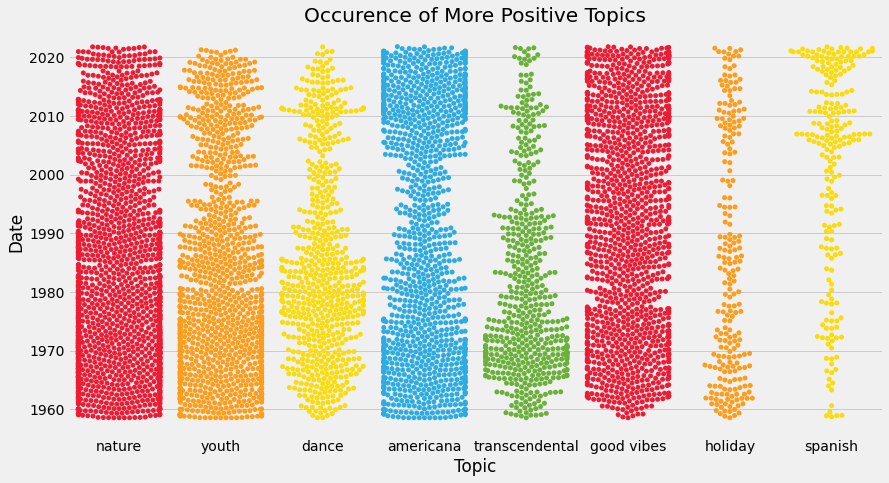

In [282]:
df7 = df.copy()
# train3 = train3.sample(3_000)
df7['affection_v_sex'] = np.where(df7['topic_name'].isin(['good vibes', 'nature', 'americana','youth', 'dance', 
                 'transcendental', 'holiday', 'spanish']), df7['topic_name'], 
                                                None)
ax = sns.swarmplot(data = df7, x = 'affection_v_sex', y = 'date', palette = palette)
ax.set(title = 'Occurence of More Positive Topics')
plt.ylabel('Date')
plt.xlabel('Topic')
plt.show()

In [43]:
# Original
def relationships_swarm(df):  
    df5 = df.copy()
    df5['relationship_topics'] = np.where(df5['topic_name'].isin(['affection','love', 'sex', 
                                                         'heartache', 'jealousy','breakups']), df5['topic_name'], None)
    ax = sns.swarmplot(data = df5, x = 'relationship_topics', y = 'date')
    ax.set(title = '\'Breakup\' and \'Love\' Songs Have A Consistent Presence Over The Decades\nWhile It Appears \'Affection\' And \'Sex\' Show A Trade-off')
    plt.ylabel('Decades')
    plt.xlabel('Relationship Topics')
    return

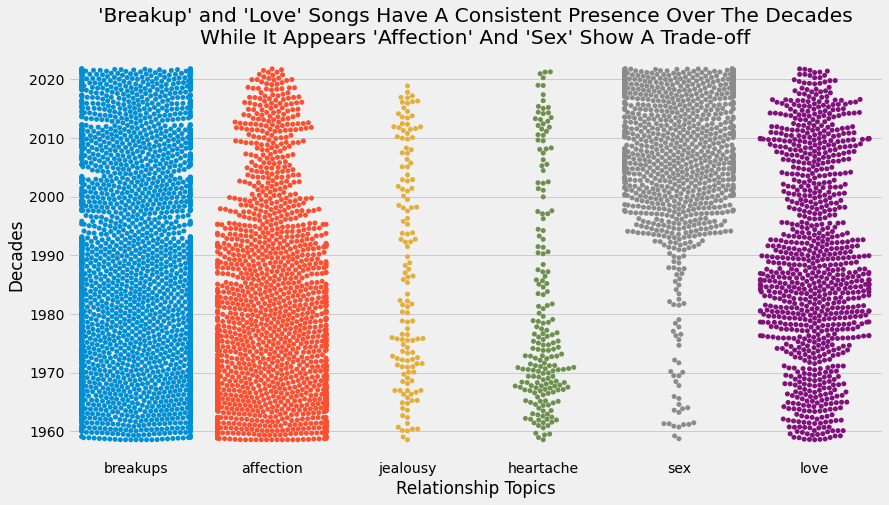

In [44]:
relationships_swarm(train)

In [261]:
# Billboard Colors
def relationships_swarm(df):  
    df5 = df.copy()
    df5['relationship_topics'] = np.where(df5['topic_name'].isin(['affection','love', 'sex', 
                                                         'heartache', 'jealousy','breakups']), df5['topic_name'], None)
    ax = sns.swarmplot(data = df5, x = 'relationship_topics', y = 'date', palette = palette)
    ax.set(title = '\'Breakup\' and \'Love\' Songs Have A Consistent Presence Over The Decades\nWhile It Appears \'Affection\' And \'Sex\' Show A Trade-off')
    plt.ylabel('Decades')
    plt.xlabel('Relationship Topics')
    return

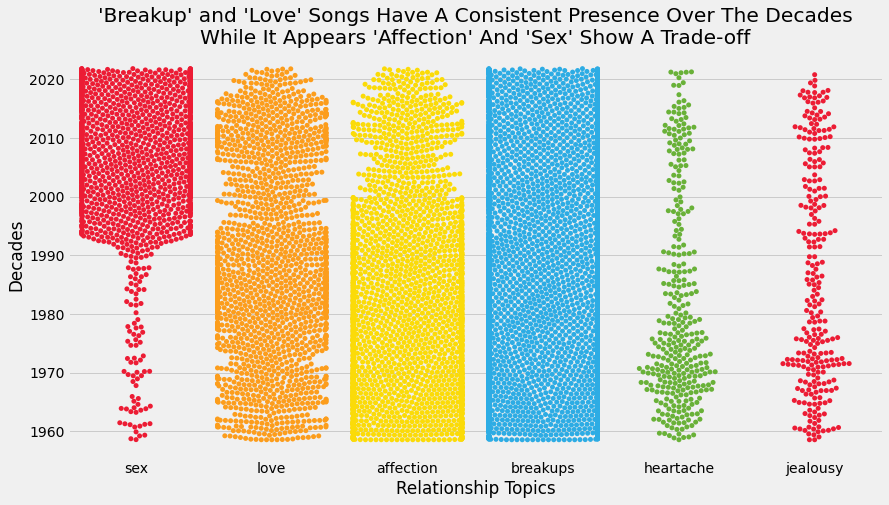

In [263]:
relationships_swarm(df)

In [73]:
# Original
def touch_swarm(df):  
    df6 = df.copy()
    # train3 = train3.sample(3_000)
    df6['affection_v_sex'] = np.where(df6['topic_name'].isin(['affection','sex']), df6['topic_name'], 
                                                    None)
    ax = sns.swarmplot(data = df6, x = 'affection_v_sex', y = 'date')
    ax.set(title = '\'Affection\' Has Been Replaced By More Explicit \'Sex\' Lyrics')
    plt.ylabel('Date')
    plt.xlabel('Topic')
    return

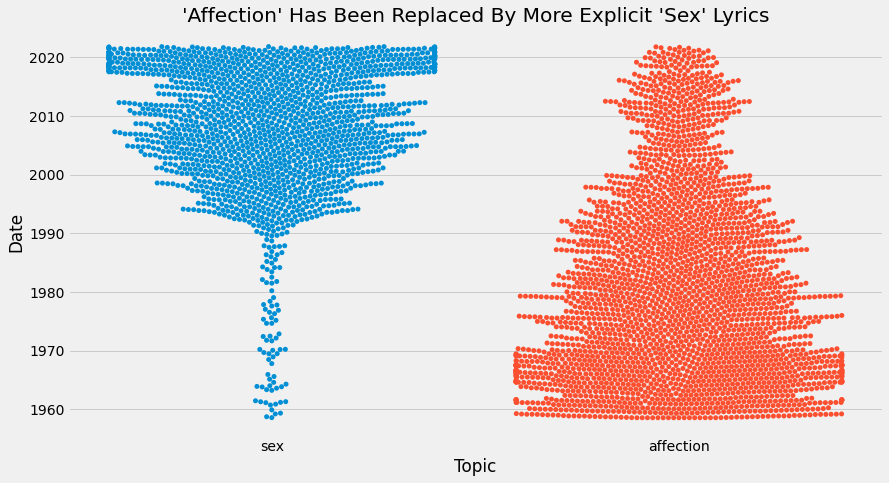

In [74]:
touch_swarm(df)

In [287]:
# Billboard Colors
def sa_swarm(df):  
    palette = [
              '#ec1c34', #(red)
                       '#fc9d1c', #(orange)
#               '#2dace4', #(blue)
#                        '#fbdb08', #(yellow)
#               '#69b138' #(green)
              ]
    df6 = df.copy()
    # train3 = train3.sample(3_000)
    df6['affection_v_sex'] = np.where(df6['topic_name'].isin(['affection','sex']), df6['topic_name'], 
                                                    None)
    ax = sns.swarmplot(data = df6, x = 'affection_v_sex', y = 'date', palette = palette)
    ax.set(title = '\'Affection\' Has Been Replaced By More Explicit \'Sex\' Lyrics')
    plt.ylabel('Date')
    plt.xlabel('Topic')
    return

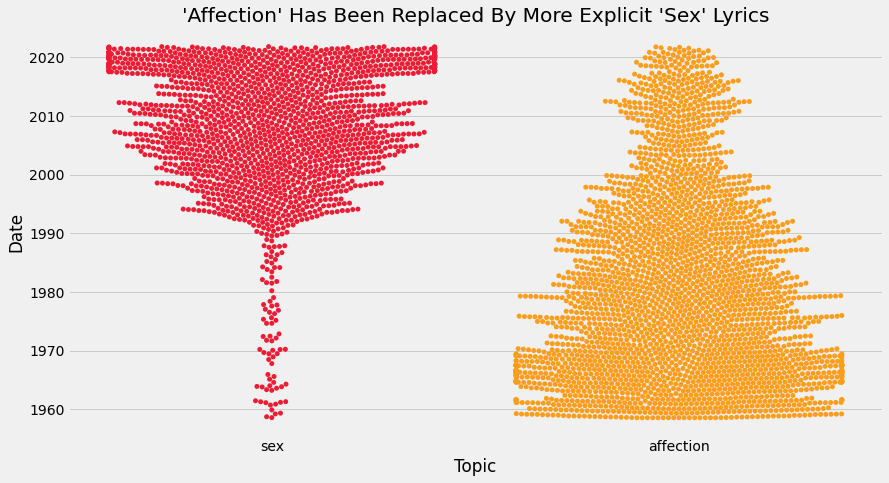

In [288]:
sa_swarm(df)

In [264]:
def vice_bar(df):   
    # create a variable that stores a list relationship topics
    vices = ['sex', 'money', 'violence']
    # make a copy
    df3 = df.copy()
    # add a column to the dataframe where any topic that is a vices topic is gathered and all 
    # others are represented by 'other'
    df3['vice_topics'] = np.where(df3.topic_name.isin(vices), df3.topic_name, 'other')
    # drop anything that isn't a relationship topic
    df3 = df3.loc[df3['vice_topics'] != 'other']
    df3.groupby('decade').topic_name.value_counts(normalize = True).unstack().plot(kind = 'bar', width = 1, ec = 'black')
    plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad=0.)
    plt.title('Vice Topics\' Prevalence Over the Decades')
    plt.xlabel('Decade of Song')
    plt.xticks(rotation = 25)
    plt.ylabel('Song Topic Count')
    plt.show()
    return

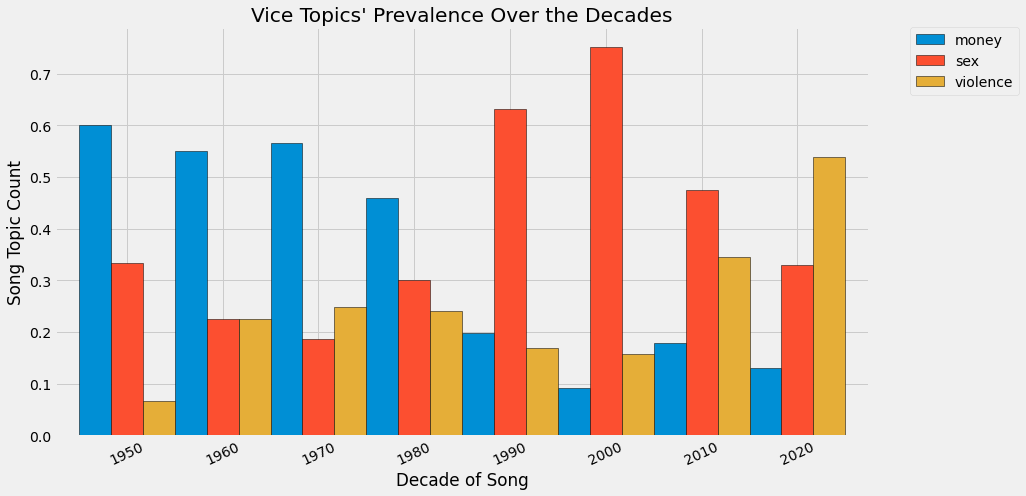

In [265]:
vice_bar(df)

In [266]:
def vice_bar(df): 
    # create a variable that stores a list relationship topics
    vices = ['sex', 'money', 'violence']
    # make a copy
    df3 = df.copy()
    # add a column to the dataframe where any topic that is a vices topic is gathered and all 
    # others are represented by 'other'
    df3['vice_topics'] = np.where(df3.topic_name.isin(vices), df3.topic_name, 'other')
    # drop anything that isn't a relationship topic
    df3 = df3.loc[df3['vice_topics'] != 'other']
    df3.groupby('decade').topic_name.value_counts(normalize = True).unstack().plot(kind = 'bar', colormap = cmap, width = 1, ec = 'black')
    plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad=0.)
    plt.title('Vice Topics\' Prevalence Over the Decades')
    plt.xlabel('Decade of Song')
    plt.xticks(rotation = 25)
    plt.ylabel('Song Topic Count')
    plt.show()
    return

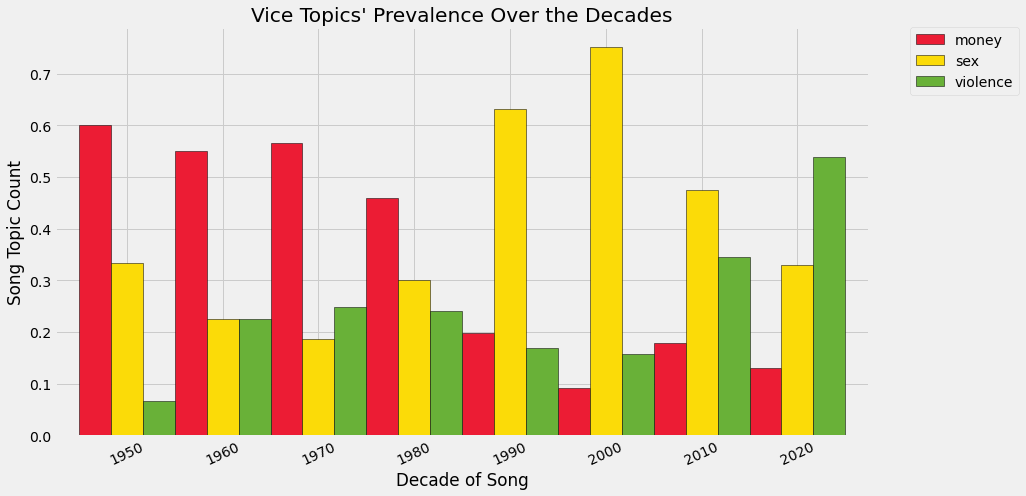

In [267]:
vice_bar(df)

In [235]:
#Original
def vice_swarm(df, cmap=my_cmap):
    my_cmap = ListedColormap([
                        '#ec1c34', #(red)
                        '#fc9d1c', #(orange)
                        '#fbdb08', #(yellow)
                        '#2dace4', #(blue)
                        '#69b138' #(green)
                       ])
    df4 = df.copy()
    # train3 = train3.sample(3_000)
    df4['vices'] = np.where(df4['topic_name'].isin(['sex', 'money', 'violence']), df4['topic_name'], 
                                                    None)
    ax = sns.swarmplot(data = df4, x = 'vices', y = 'date')
    ax.set(title = 'Vice Topics Have Increased Significantly Beginning In The 90\'s')
    plt.ylabel('Decades')
    plt.xlabel('Top 3 \'Vice\' Topics')
    return

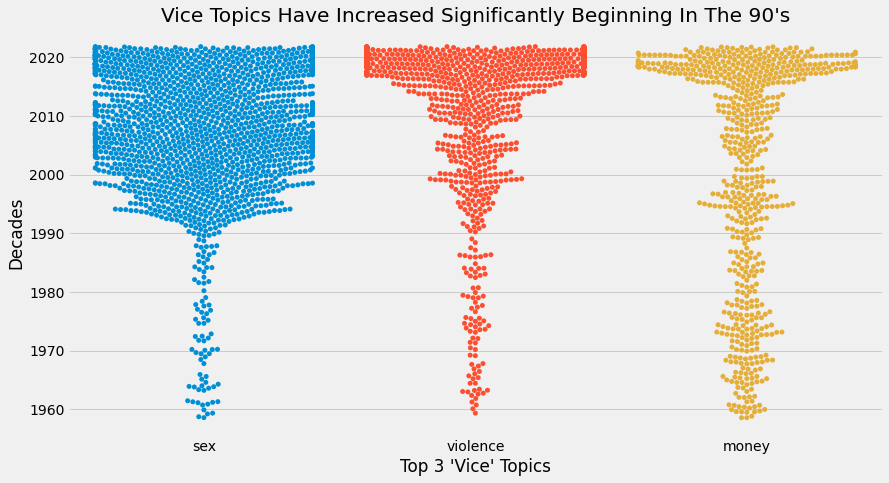

In [234]:
vice_swarm(df)

In [285]:
# Billboard Colors
def vice_swarm(df):
    palette = [
                        '#ec1c34', #(red)
#                         '#fc9d1c', #(orange)
                        '#2dace4', #(blue)
#                         '#fbdb08', #(yellow)

                        '#69b138' #(green)
                       ]
    df4 = df.copy()
    # train3 = train3.sample(3_000)
    df4['vices'] = np.where(df4['topic_name'].isin(['sex', 'money', 'violence']), df4['topic_name'], 
                                                    None)
    ax = sns.swarmplot(data = df4, x = 'vices', y = 'date', palette = palette)
    ax.set(title = 'Vice Topics Have Increased Significantly Beginning In The 90\'s')
    plt.ylabel('Decades')
    plt.xlabel('Top 3 \'Vice\' Topics')
    return

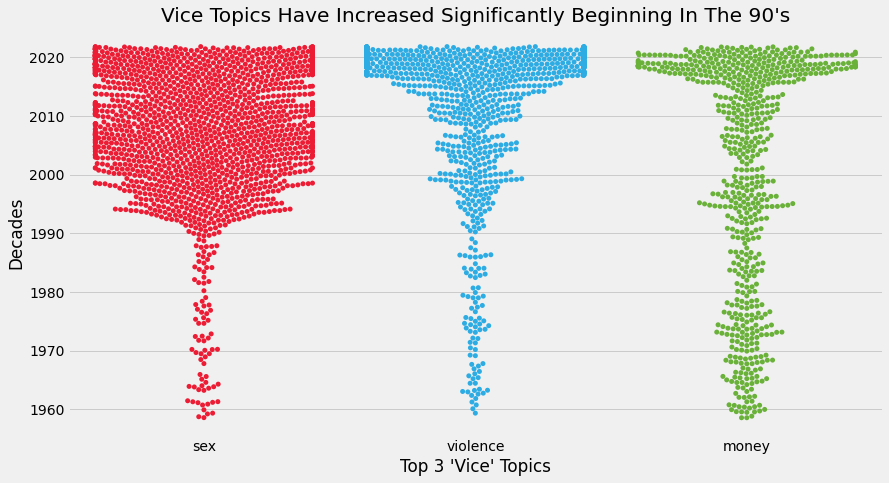

In [286]:
vice_swarm(df)